In [1]:
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from sklearn.preprocessing import OneHotEncoder

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential(
    
)

In [8]:
base_model = tf.keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)

#### Redes Neurais

![Title](imgs/rn.png)

#### Introdução a Redes Convolucionais
* Abordagem de redes neurais que possui pelo menos uma camada convolucional
- composição de neurônios em estruturas conhecidas como filtros
- Aprende informações detalhadas 
- Estrutura em camadas com diferentes filtros

![Title](imgs/cnn.png)


### Prática
1. Aquisição e pré-processamento dos dados
2. Treinamento
* Implementar arquitetura
* Definir otimizadores, métricas e regularizadores
3. Teste (avaliação de desempenho)

#### 1. Aquisição dos dados

![Title](imgs/mnist_digits_sample.jpg) 

In [6]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)


In [8]:
x_train = np.expand_dims(x_train,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)

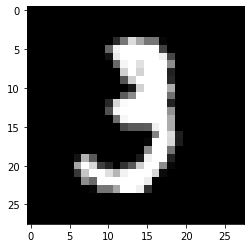

In [9]:
# pick a sample to plot
sample = 10
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

#### 2. Pré-processamento

#### Normalização

In [10]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

#### One hot encoder na variável alvo

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 3. Particionamento de base de dados

In [14]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((48000, 28, 28, 1),
 (12000, 28, 28, 1),
 (10000, 28, 28, 1),
 (48000, 10),
 (12000, 10),
 (10000, 10))

In [16]:
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

#### 4. Treinamento - definição de arquitetura
1. Definir quantas camadas são necessárias par o problema
2. A quantidade de neurônios em cada camada
3. A função de ativação de cada camada
4. A função de ativação da saída
* softmax (saída não binária)
* sigmoid (saída binária)

In [17]:
rede_simples = Sequential()

rede_simples.add(Conv2D(25, (5,5), activation='relu', input_shape=(28,28,1)))
rede_simples.add(MaxPooling2D())
rede_simples.add(Conv2D(25, (5,5), activation='relu'))
rede_simples.add(MaxPooling2D())
rede_simples.add(Flatten())
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))
                 
rede_simples.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 25)        650       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 25)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 25)          15650     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 25)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                4010      
_________________________________________________________________
activation (Activation)      (None, 10)                0

### 5. Definir otimizadores

![Title](imgs/otimizadores.gif) 

In [18]:
rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


#### 6. Treinamento

1. Adicionar conjuntos de treinamento e validação
2. Determinar a quantidade de épocas

In [19]:
#### 6. Treinamento

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 20, 
                             verbose = 1,
                             batch_size=32,
                             validation_data = (x_val, y_val))

2022-09-30 18:05:12.051262: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2078 - accuracy: 0.9384 - val_loss: 0.0858 - val_accuracy: 0.9739
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0684 - accuracy: 0.9784 - val_loss: 0.0692 - val_accuracy: 0.9807
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 0.0607 - val_accuracy: 0.9825
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0512 - val_accuracy: 0.9850
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0408 - val_accuracy: 0.9890
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0245 - accuracy: 0.9921 - val_loss: 0.0388 - val_accuracy: 0.9895
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0203 - accuracy: 0.9936 - val_loss: 0.0398 - val_accuracy:

##### 7. Avaliação do modelo

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

0.99

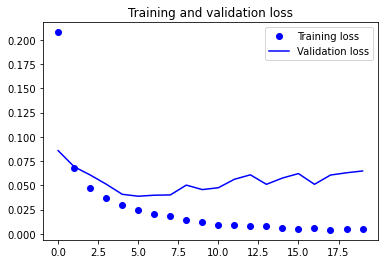

In [24]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#### 8. Regularização
1. Early Stopping: determinar quando encerrar o treinamento
2. Dropout: selecionar neurônios aleatoriamente para o treinamento

In [25]:
 es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')

# Setamos os pesos iniciais iguais à versão antes do treinamento pra ter um comparativo mais real.
#rede_simples.set_weights(pesos_iniciais)

historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=32,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0040 - accuracy: 0.9988 - val_loss: 0.0633 - val_accuracy: 0.9893
Epoch 2/150
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0040 - accuracy: 0.9986 - val_loss: 0.0636 - val_accuracy: 0.9893
Epoch 3/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 0.0782 - val_accuracy: 0.9870
Epoch 4/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 0.0763 - val_accuracy: 0.9895
Epoch 5/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0047 - accuracy: 0.9982 - val_loss: 0.0739 - val_accuracy: 0.9881
Epoch 6/150
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.0789 - val_accuracy: 0.9891
Epoch 7/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 0.0730 - val_ac

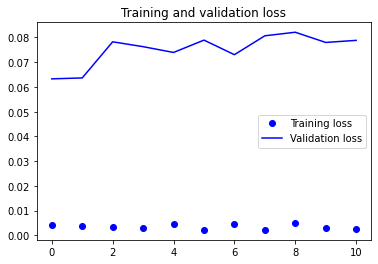

In [26]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_es = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_es.argmax(1))

0.9903

In [28]:
confusion_matrix(y_test.argmax(1), pred_es.argmax(1))

array([[ 971,    0,    2,    0,    0,    0,    3,    3,    1,    0],
       [   1, 1130,    1,    1,    0,    0,    1,    1,    0,    0],
       [   0,    3, 1020,    0,    0,    0,    0,    8,    1,    0],
       [   0,    0,    1, 1000,    0,    6,    0,    1,    1,    1],
       [   0,    0,    0,    0,  975,    0,    1,    3,    0,    3],
       [   0,    0,    0,    3,    0,  887,    1,    1,    0,    0],
       [   2,    3,    0,    0,    1,    3,  949,    0,    0,    0],
       [   0,    2,    2,    0,    0,    0,    0, 1022,    1,    1],
       [   4,    0,    2,    0,    0,    2,    2,    1,  961,    2],
       [   0,    0,    1,    1,    7,    5,    0,    6,    1,  988]])

### Regularização - Dropout

* Alterna quais neurônios vão otimizar os pesos a cada rodada do treinamento

![Title](imgs/dropout_.gif) 

In [29]:
rede_simples = Sequential()

rede_simples.add(Conv2D(25, (5,5), activation='relu', input_shape=(28,28,1)))
rede_simples.add(MaxPooling2D())
rede_simples.add(Dropout(0.5))
rede_simples.add(Conv2D(25, (5,5), activation='relu'))
rede_simples.add(MaxPooling2D())
rede_simples.add(Dropout(0.5))
rede_simples.add(Flatten())
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))
                 
rede_simples.summary()

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 25)        650       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 25)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 25)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 25)          15650     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 25)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)              

In [30]:
 historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3938 - accuracy: 0.8736 - val_loss: 0.0990 - val_accuracy: 0.9685
Epoch 2/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1477 - accuracy: 0.9541 - val_loss: 0.0661 - val_accuracy: 0.9787
Epoch 3/150
1500/1500 [==============================] - 13s 8ms/step - loss: 0.1141 - accuracy: 0.9648 - val_loss: 0.0522 - val_accuracy: 0.9842
Epoch 4/150
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1001 - accuracy: 0.9683 - val_loss: 0.0477 - val_accuracy: 0.9851
Epoch 5/150
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0898 - accuracy: 0.9716 - val_loss: 0.0436 - val_accuracy: 0.9863
Epoch 6/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0853 - accuracy: 0.9741 - val_loss: 0.0413 - val_accuracy: 0.9875
Epoch 7/150
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0796 - accuracy: 0.9749 - val_loss: 0.0397 - v

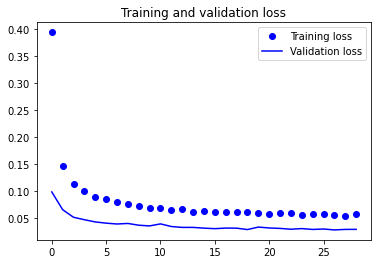

In [31]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
pred_dropout = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_dropout.argmax(1))

0.9916

In [33]:
confusion_matrix(y_test.argmax(1), pred_dropout.argmax(1))

array([[ 978,    0,    1,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1132,    0,    2,    0,    0,    0,    1,    0,    0],
       [   1,    1, 1025,    0,    1,    0,    0,    3,    1,    0],
       [   0,    0,    0, 1004,    0,    3,    0,    2,    1,    0],
       [   0,    0,    0,    0,  975,    0,    0,    0,    1,    6],
       [   1,    0,    0,    3,    0,  885,    1,    1,    0,    1],
       [   7,    3,    1,    0,    1,    1,  945,    0,    0,    0],
       [   0,    5,    5,    1,    0,    0,    0, 1014,    0,    3],
       [   2,    0,    1,    2,    0,    1,    0,    0,  966,    2],
       [   0,    0,    0,    0,    5,    5,    0,    6,    1,  992]])

# Prática 2 - CIFAR 10

![Title](imgs/cifar10_dataset.png) 

![Title](imgs/fine.jpeg) 

In [34]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [35]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 1)


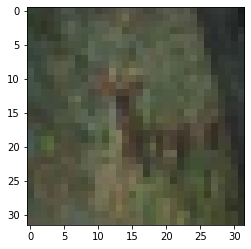

In [36]:
# pick a sample to plot
sample = 10
image = x_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image)
plt.show()

In [37]:
m = np.max(x_train)
x_train = x_train/m
x_test = x_test/m

In [38]:
hot = OneHotEncoder()
y_train = hot.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = hot.transform(y_test.reshape(-1, 1)).toarray()

In [39]:
from sklearn.model_selection import train_test_split

x_treino, x_val, y_treino, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)

x_treino.shape, x_val.shape, x_test.shape, y_treino.shape, y_val.shape, y_test.shape, 

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

In [40]:
rede_simples = Sequential()

rede_simples.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)))
rede_simples.add(MaxPooling2D())
rede_simples.add(Conv2D(64, (5,5), activation='relu'))
rede_simples.add(MaxPooling2D())
rede_simples.add(Conv2D(64, (5,5), activation='relu'))
rede_simples.add(Flatten())
rede_simples.add(Dense(64, activation='relu'))
rede_simples.add(Dense(10))
rede_simples.add(Activation('softmax'))
                 
rede_simples.summary()

#rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 64)          102464    
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [41]:
import tensorflow as tf

rede_simples.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [42]:
 es = EarlyStopping(monitor = 'val_loss', min_delta = 0.001, patience = 10, verbose = 1, mode = 'auto')
    
historico = rede_simples.fit(x_treino, 
                             y_treino, 
                             epochs = 150, 
                             batch_size=64,
                             verbose = 1,
                             validation_data = (x_val, y_val),
                             callbacks = [es])

Epoch 1/150
625/625 [==============================] - 17s 26ms/step - loss: 1.6950 - accuracy: 0.3701 - val_loss: 1.4322 - val_accuracy: 0.4794
Epoch 2/150
625/625 [==============================] - 12s 20ms/step - loss: 1.3437 - accuracy: 0.5178 - val_loss: 1.2918 - val_accuracy: 0.5284
Epoch 3/150
625/625 [==============================] - 13s 20ms/step - loss: 1.1909 - accuracy: 0.5774 - val_loss: 1.1662 - val_accuracy: 0.5824
Epoch 4/150
625/625 [==============================] - 13s 20ms/step - loss: 1.0971 - accuracy: 0.6108 - val_loss: 1.1202 - val_accuracy: 0.6057
Epoch 5/150
625/625 [==============================] - 13s 20ms/step - loss: 1.0201 - accuracy: 0.6402 - val_loss: 1.0730 - val_accuracy: 0.6222
Epoch 6/150
625/625 [==============================] - 13s 21ms/step - loss: 0.9497 - accuracy: 0.6648 - val_loss: 1.0145 - val_accuracy: 0.6503
Epoch 7/150
625/625 [==============================] - 13s 22ms/step - loss: 0.9039 - accuracy: 0.6826 - val_loss: 1.0239 - val_ac

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

pred_simples = rede_simples.predict(x_test)

accuracy_score(y_test.argmax(1), pred_simples.argmax(1))

0.667

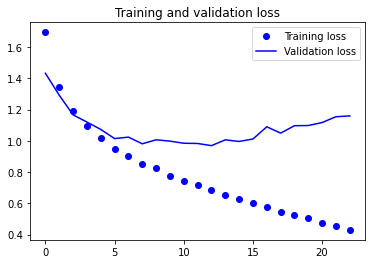

In [44]:
loss = historico.history['loss']
val_loss = historico.history['val_loss']
epochs = range(len(loss))
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

![Title](imgs/fine.jpeg) 

### Arquiteturas de Rede

CNNs tornaram-se conhecidas principalmente pelo seu desempenho em um desafio de classificação de imagens chamado ImageNet. Nesse desafio foram propostas diferentes arquiteturas de CNNs ao longo dos anos, tendo estas o melhor desempenho.

![Title](imgs/imagenet.jpeg)

#### AlexNet

* Processamento multi GPU
* Utilização de stride e maxpooling para redução de custo computacional
* 8 camadas

![Title](imgs/alexnet.png)

### VGG

* Pilhas de camadas convolucionais
* Redução de dimensionalidade de filtros
* 16 camadas 

![Title](imgs/vgg.png)


### ResNet

* Até 1000 camadas
* Similar a VGG
* Inserção de blocos residuais 

![Title](imgs/resnet.png)

### Implementando arquiteturas conhecidas no Keras 



In [45]:
from tensorflow.keras.layers import Flatten,Dense,GlobalAvgPool2D,Dropout
from tensorflow.keras.models import Sequential

In [46]:
base_model = tf.keras.applications.VGG16(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(32, 32, 3),
    include_top=False,
)

In [ ]:
inputs = tf.keras.Input(shape=(32, 32, 3))
flatten = Flatten()
dense = Dense(10,activation='softmax')

model = Sequential([
        base_model,
        flatten,
        dense
    ])

model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
225/782 [=======>......................] - ETA: 7:14 - loss: 2.1350 - accuracy: 0.1695

In [ ]:
### 